In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
data = pd.read_csv('./data/diabetes_dataset.csv')

In [44]:
x= data.drop('Outcome',axis=1)
y= data['Outcome']

In [45]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [47]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [48]:
y_pred = model.predict(x_test)
accuracy_score = accuracy_score(y_test,y_pred)
print(f'Model Accuracy: {accuracy_score:.2f}')
print(f'Classification Report {classification_report(y_test,y_pred)}')

Model Accuracy: 0.75
Classification Report               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



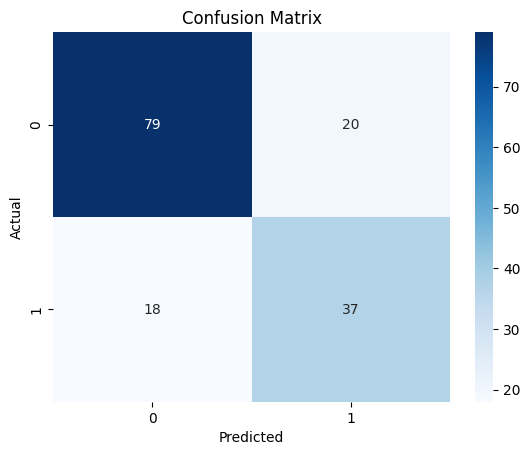

In [49]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [50]:
with open('./model/trained_model.pkl','wb') as file:
    pickle.dump(model,file)
print('Model Saved')    

Model Saved


In [51]:
with open('./model/scaler.pkl','wb') as scaler_file:
    pickle.dump(scaler,scaler_file)
print('Scaler Saved')    

Scaler Saved
